In [ ]:
pip install pacmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552451 sha256=1886fcd7d7f014eb03e4da4713431c2d60d5b8d17b8182129d0f6bc746e4a99f
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pacmap

In [ ]:
df = pd.read_csv('/content/P2C_latest.csv')

In [ ]:
index = df[((df['snr_ch1'] < 30) & (df['Instrument'] == 'V4')) |
           ((df['snr_ch2'] < 30) & (df['Instrument'] == 'V4')) |
           ((df['snr_ch3'] < 30) & (df['Instrument'] == 'V4'))].index
df.drop(index, inplace=True)
index = df[((df['snr_ch1'] < 50) & (df['Instrument'] == 'FLImBrush')) |
           ((df['snr_ch2'] < 50) & (df['Instrument'] == 'FLImBrush')) |
           ((df['snr_ch3'] < 50) & (df['Instrument'] == 'FLImBrush'))].index
df.drop(index, inplace=True)

index = df[((df['lifet_avg_ch1'] > 15) | (df['lifet_avg_ch1'] < 1)) |
           ((df['lifet_avg_ch2'] > 15) | (df['lifet_avg_ch2'] < 1)) |
           ((df['lifet_avg_ch3'] > 15) | (df['lifet_avg_ch3'] < 1))].index
df.drop(index, inplace=True)

index = df[df['Instrument'] == 'V4'].index
df.drop(index, inplace=True)
index = df[df['Channel'] == 'ch4'].index
df.drop(index, inplace=True)

In [ ]:
df = df[((df['Tissue'] == 'both') | (df['Tissue'] == 'white matter') | (df['Tissue'] == 'cortex')
         | (df['Tissue'] == 'none'))]
 # Relabel for ML and Analysis
index = df[((df['Cellularity'] == 'dense, moderate & low') | (df['Cellularity'] == 'na'))].index
df.drop(index, inplace=True)

index = df[((df['Tissue'] == 'cortex') & ((df['Cellularity'] == 'absent') |
                                          (df['Cellularity'] == 'low')))].index
df.loc[index, 'ML_label'] = 'Normal'

index = df[((df['Tissue'] == 'cortex') & ((df['Cellularity'] == 'moderate') |
                                          (df['Cellularity'] == 'high')))].index
df.loc[index, 'ML_label'] = 'Tumor'

index = df[((df['Tissue'] == 'white matter') & ((df['Cellularity'] == 'absent') |
                                                (df['Cellularity'] == 'low')))].index
df.loc[index, 'ML_label'] = 'Normal'

index = df[((df['Tissue'] == 'white matter') & ((df['Cellularity'] == 'moderate') |
                                                (df['Cellularity'] == 'high')))].index
df.loc[index, 'ML_label'] = 'Tumor'

index = df[((df['Tissue'] == 'both') & ((df['Cellularity'] == 'absent') |
                                        (df['Cellularity'] == 'low')))].index
df.loc[index, 'ML_label'] = 'Normal'

index = df[((df['Tissue'] == 'both') & ((df['Cellularity'] == 'moderate') |
                                        (df['Cellularity'] == 'high')))].index
df.loc[index, 'ML_label'] = 'Tumor'

index = df[(df['Tissue'] == 'none')].index
df.loc[index, 'ML_label'] = 'Tumor'

In [ ]:
tmp = df['ML_label']
d = pd.DataFrame(tmp)

# Select tissue types e.g. cortex, cortex + white matter
index = df[((df['Tissue'] == 'both') | (df['Tissue'] == 'white matter')
            | (df['Tissue'] == 'cortex') | (df['Tissue'] == 'none'))].index

df_cw = df.loc[index].copy()

In [ ]:
df_a = df_cw
df_a = df_a.dropna()

df_a = df_a[df_a['Case'] == 74]
print(df_a.shape)
fig_name = 'P_54_Run_Cellularity.png'

(3141, 105)


In [ ]:

selected_columns= ['lifet_avg_ch1', 'lifet_avg_ch2', 'lifet_avg_ch3', 'int_ratio_ch1', 'int_ratio_ch2','int_ratio_ch3',
       'Laguerre_coeffs_1_ch1', 'Laguerre_coeffs_2_ch1','Laguerre_coeffs_3_ch1', 'Laguerre_coeffs_4_ch1',
       'Laguerre_coeffs_5_ch1', 'Laguerre_coeffs_6_ch1','Laguerre_coeffs_7_ch1', 'Laguerre_coeffs_8_ch1',
       'Laguerre_coeffs_9_ch1', 'Laguerre_coeffs_10_ch1','Laguerre_coeffs_11_ch1', 'Laguerre_coeffs_12_ch1',
       'Laguerre_coeffs_1_ch2', 'Laguerre_coeffs_2_ch2','Laguerre_coeffs_3_ch2', 'Laguerre_coeffs_4_ch2',
       'Laguerre_coeffs_5_ch2', 'Laguerre_coeffs_6_ch2','Laguerre_coeffs_7_ch2', 'Laguerre_coeffs_8_ch2',
       'Laguerre_coeffs_9_ch2', 'Laguerre_coeffs_10_ch2','Laguerre_coeffs_11_ch2', 'Laguerre_coeffs_12_ch2',
       'Laguerre_coeffs_1_ch3', 'Laguerre_coeffs_2_ch3','Laguerre_coeffs_3_ch3', 'Laguerre_coeffs_4_ch3',
       'Laguerre_coeffs_5_ch3', 'Laguerre_coeffs_6_ch3','Laguerre_coeffs_7_ch3', 'Laguerre_coeffs_8_ch3',
       'Laguerre_coeffs_9_ch3', 'Laguerre_coeffs_10_ch3','Laguerre_coeffs_11_ch3', 'Laguerre_coeffs_12_ch3']

X= df_a[selected_columns]
y = df_a['Run']
tmp = df_a.drop_duplicates(subset=['Run'])

addvar = tmp['Cellularity']
addvar1 = tmp['Tissue']
tmp = tmp['Run']
tmp = tmp.tolist()
patient_lst = np.array(tmp)

addvar = addvar.tolist()
addvar_lst = np.array(addvar)

addvar1 = addvar1.tolist()
addvar1_lst = np.array(addvar1)

num_patients = patient_lst.size

In [ ]:
# initializing the pacmap instance
# Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0)
X_transformed = embedding.fit_transform(X, init="pca")

<ipython-input-45-103d119d4153>:26: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in custom_legend.legendHandles:


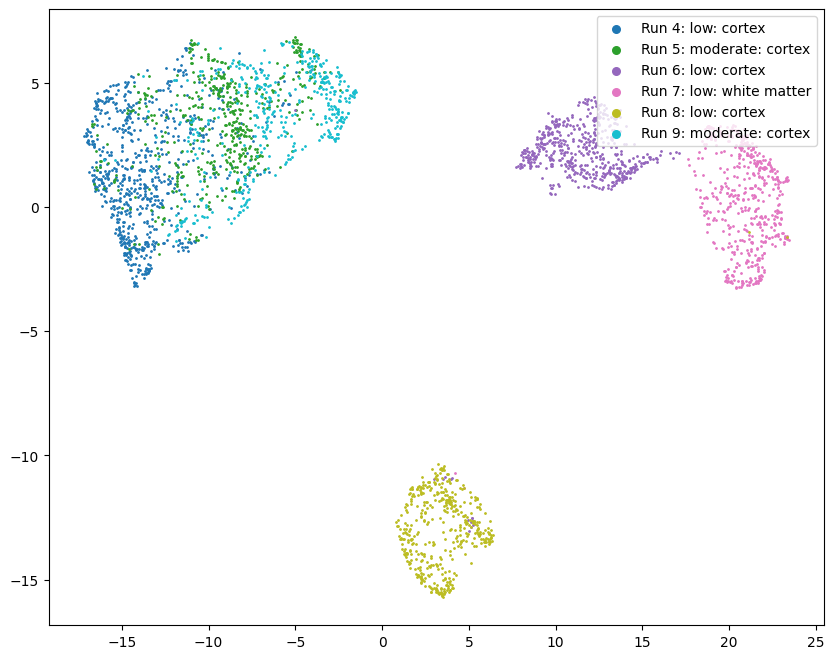

In [ ]:
# visualize the embedding

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create a colormap based on the number of patients
cmap = plt.get_cmap('tab10', num_patients)
additional_variable = addvar_lst
additional_variable1 = addvar1_lst
j = 0
# Plot the data for each patient
for i in patient_lst:
    mask = y == i
    label = 'Run {}: {}: {}'.format(i, additional_variable[j], additional_variable1[j])
    plt.scatter(X_transformed[mask, 0], X_transformed[mask, 1], color=cmap(j), s=1, label=label)
    j = j + 1
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))



# Create a custom legend with larger points
custom_legend = plt.legend(by_label.values(), by_label.keys(), loc='upper right')

# Set the number of scatter points displayed in the legend
for handle in custom_legend.legendHandles:
    handle.set_sizes([30])  # Adjust the size as needed

# Display the plot
plt.show()

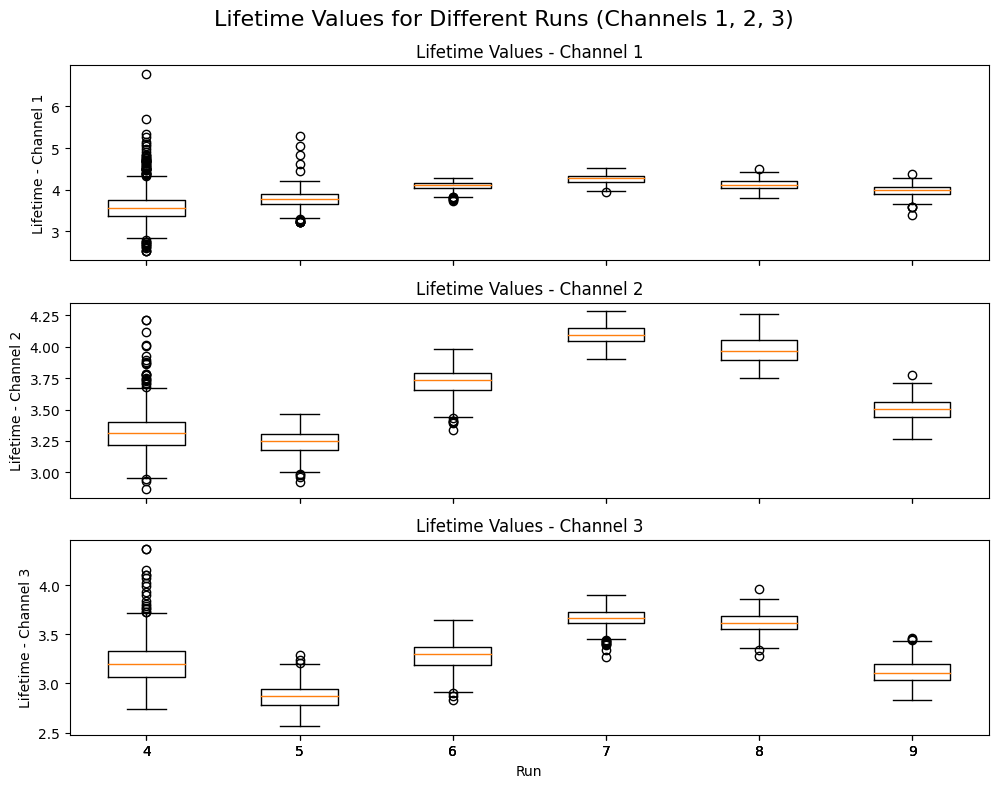

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded and preprocessed your data
# X, y, df_a, and fig_name should be defined

# Columns containing lifetime values for channels 1, 2, and 3
lifetime_columns = ['lifet_avg_ch1', 'lifet_avg_ch2', 'lifet_avg_ch3']

# Create a subplot with 3 subplots (one for each channel)
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Iterate through each channel and create box plots
for i, channel in enumerate(lifetime_columns):
    ax = axes[i]
    ax.set_title(f'Lifetime Values - Channel {i + 1}')

    # Create a list of data series for each run
    data_by_run = [df_a[df_a['Run'] == run][channel].values for run in df_a['Run'].unique()]

    # Create box plots for each run
    ax.boxplot(data_by_run, labels=df_a['Run'].unique())
    ax.set_ylabel(f'Lifetime - Channel {i + 1}')

# Set common x-axis label
plt.xlabel('Run')

# Add a title for the entire plot
plt.suptitle('Lifetime Values for Different Runs (Channels 1, 2, 3)', fontsize=16)

# Adjust subplot layout
plt.tight_layout()

# Save the figure
plt.savefig(fig_name, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


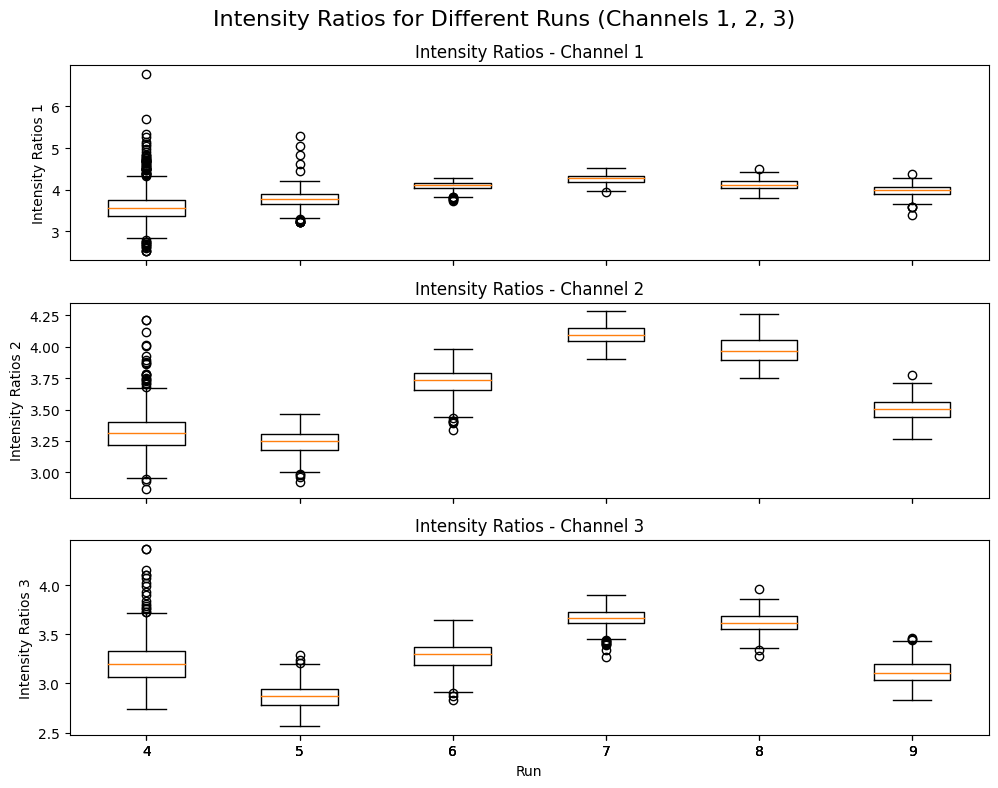

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded and preprocessed your data
# X, y, df_a, and fig_name should be defined

# Columns containing Intensity Ratios for channels 1, 2, and 3
int_ratios = ['int_ratio_ch1', 'int_ratio_ch2','int_ratio_ch3']

# Create a subplot with 3 subplots (one for each channel)
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Iterate through each channel and create box plots
for i, channel in enumerate(lifetime_columns):
    ax = axes[i]
    ax.set_title(f'Intensity Ratios - Channel {i + 1}')

    # Create a list of data series for each run
    data_by_run = [df_a[df_a['Run'] == run][channel].values for run in df_a['Run'].unique()]

    # Create box plots for each run
    ax.boxplot(data_by_run, labels=df_a['Run'].unique())
    ax.set_ylabel(f'Intensity Ratios {i + 1}')

# Set common x-axis label
plt.xlabel('Run')

# Add a title for the entire plot
plt.suptitle('Intensity Ratios for Different Runs (Channels 1, 2, 3)', fontsize=16)

# Adjust subplot layout
plt.tight_layout()

# Save the figure
plt.savefig(fig_name, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()
